In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

The objective is to make a prediction on the Customer Lifetime Value (CLV) for an automobile insurance company. CLV is the total profit earned from a customer during their association with a company. Having knowledge of the CLV of each customer enables the company to determine how much they should allocate for customer acquisition. It is possible for the acquisition cost of a customer to exceed their purchase value, however, fostering the relationship with the customer could increase their CLV to a level that makes the investment worthwhile. Understanding the significance of CLV is crucial for success in the customer-centric market.

In [2]:
df = pd.read_csv('/kaggle/input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#we must edit the columns as per date format
df['Effective To Date'] = df['Effective To Date'].astype('datetime64[ns]')

There are  around 9000 records wwith 24 distint variable

In [6]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
Income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
Monthly Premium Auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
Months Since Last Claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
Months Since Policy Inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
Number of Open Complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
Number of Policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
Total Claim Amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24


In [7]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

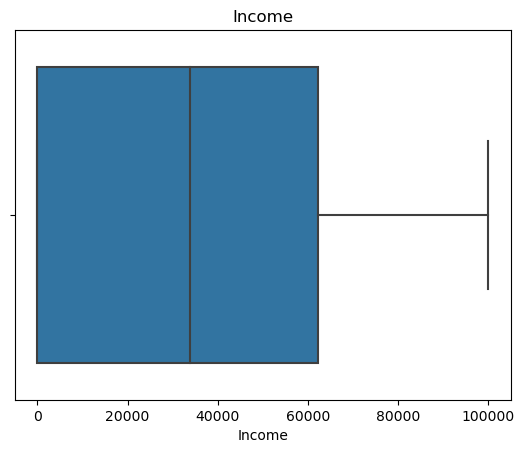

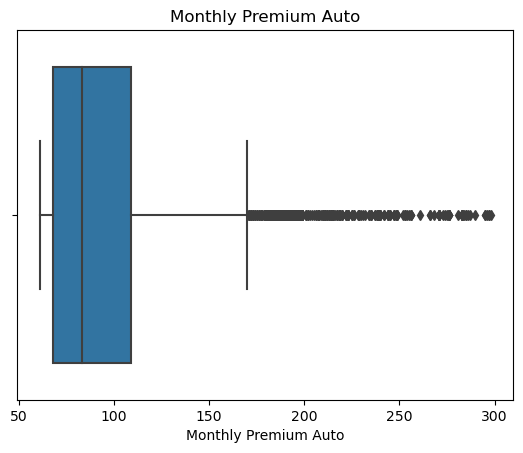

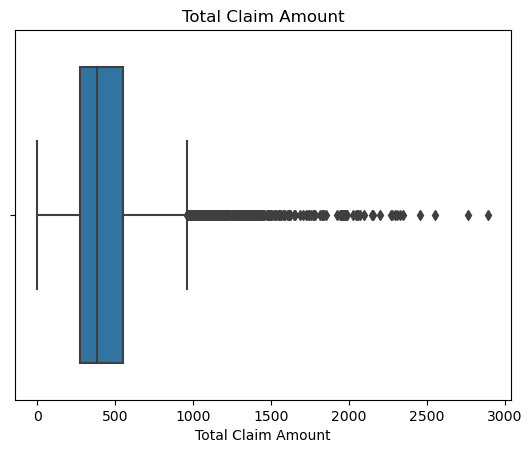

In [8]:
countt = ['Income', 'Monthly Premium Auto', 'Total Claim Amount']

for var in countt:
    sns.boxplot(x=df[var])
    plt.title(var)
    plt.show()

The box plot analysis reveals the presence of outliers in the variables "Total Claim Amount" and "Monthly Premium Auto", whereas no outliers are found in the "Income" variable. Typically, to improve the model performance, outliers are removed. However, since the data pertains to the insurance industry, the outliers could represent potential customers. Therefore, we will investigate alternative models that consider both the scenarios of including and excluding the outliers.

In [9]:
#checking all categorical variables to jott down significant ones.

cat_df = df.select_dtypes(include='object')
cat_df = cat_df.drop(['Customer'], axis = 1)
cols = cat_df.columns
cols

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

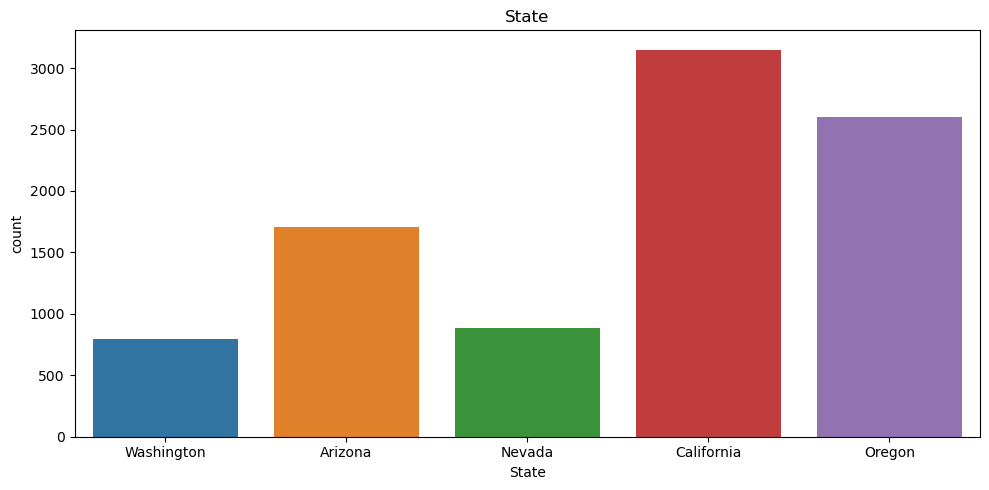

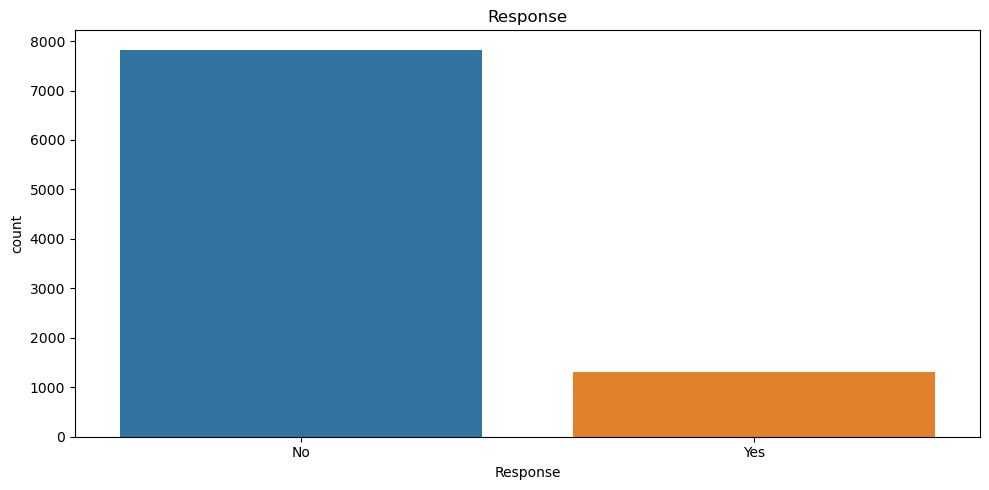

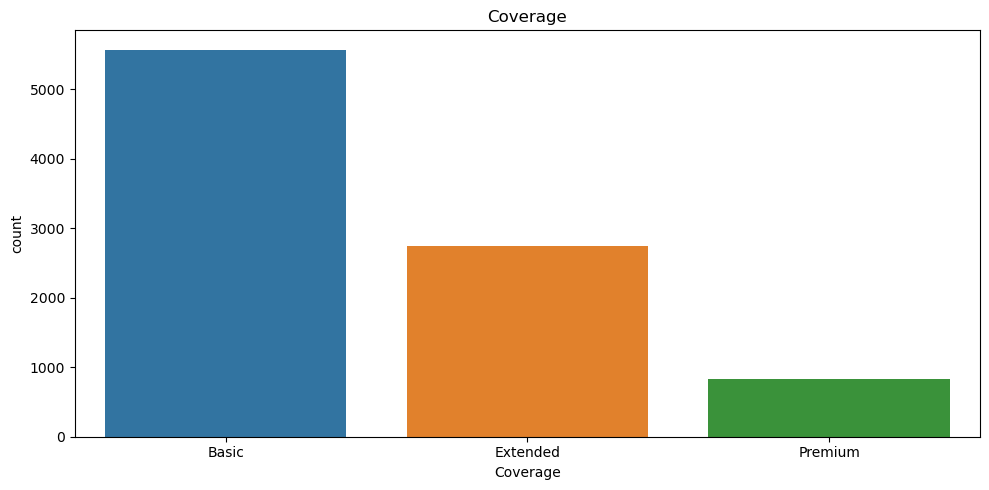

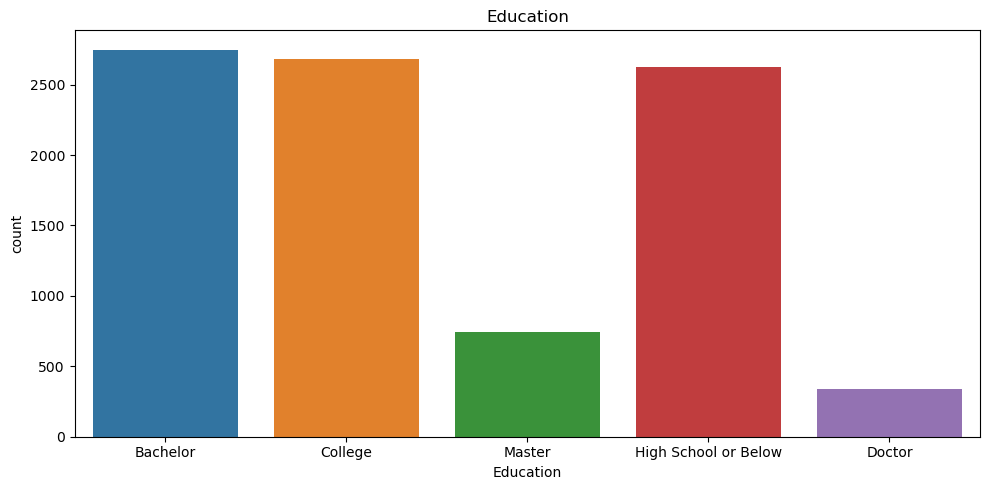

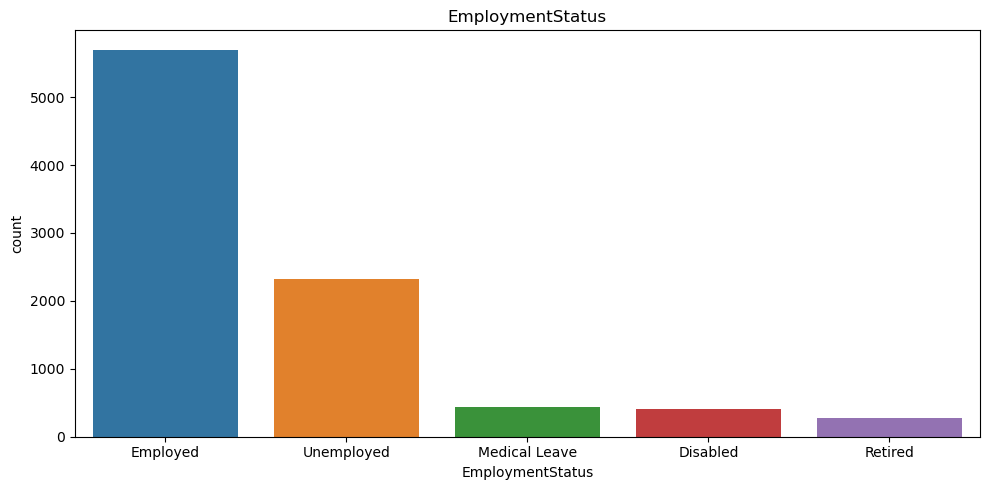

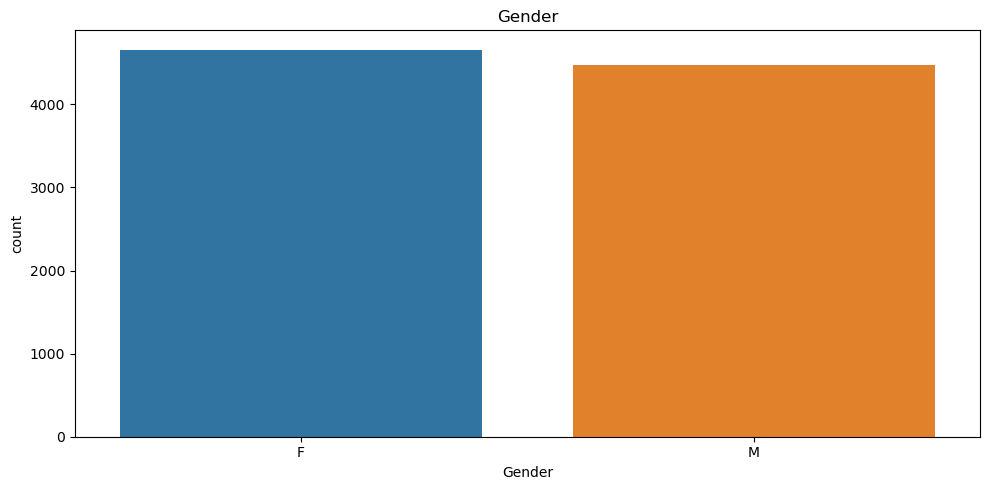

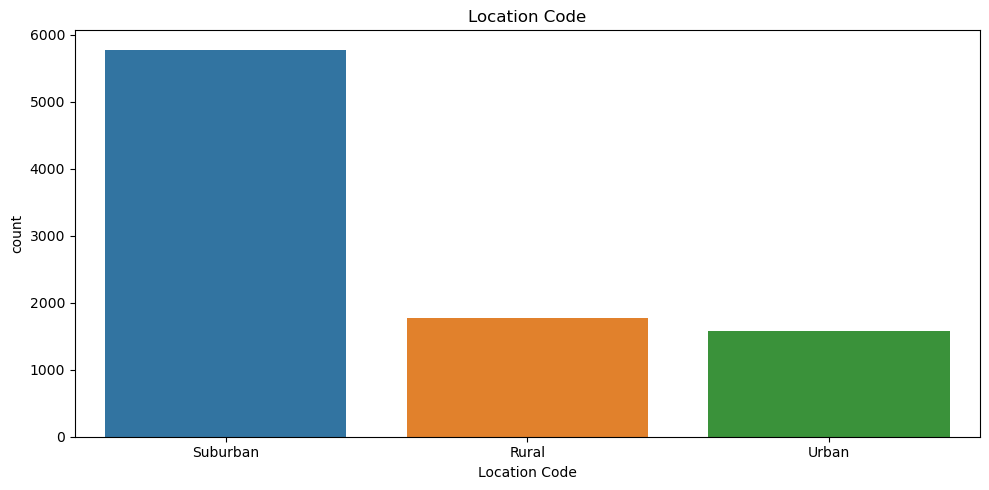

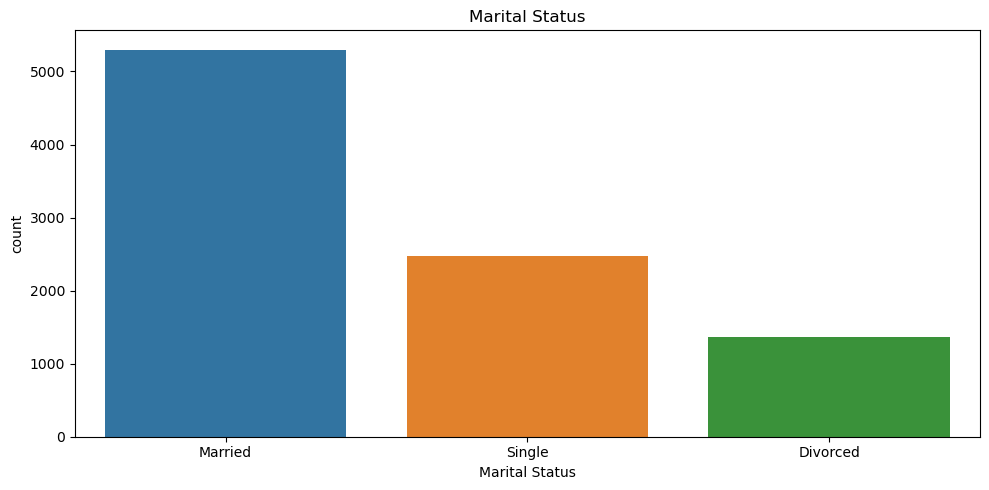

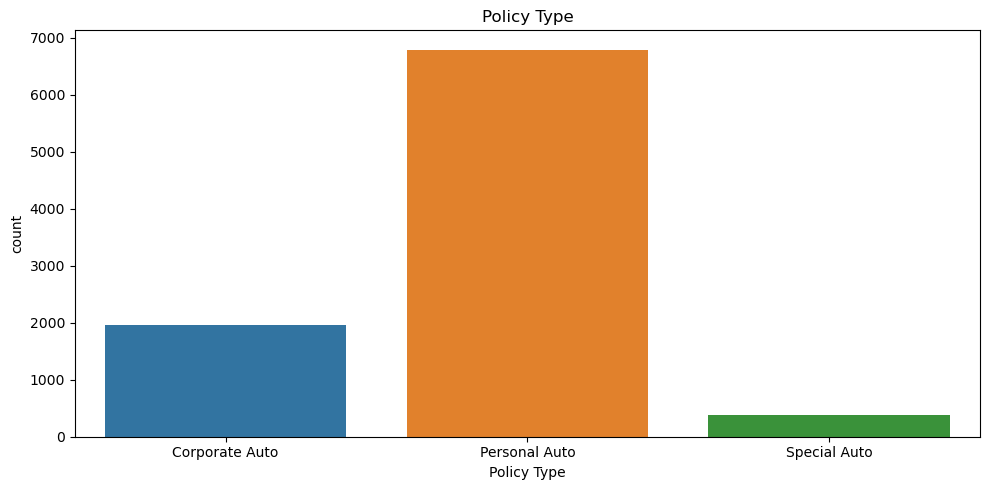

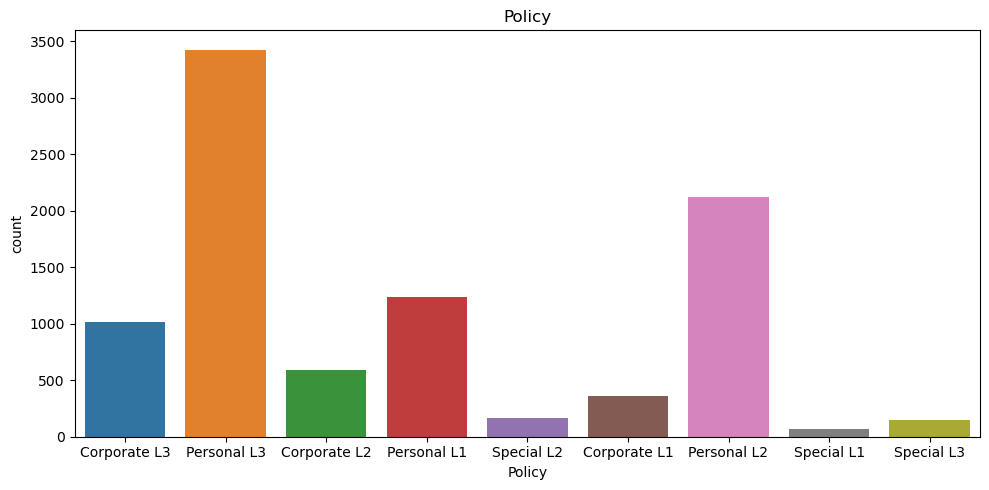

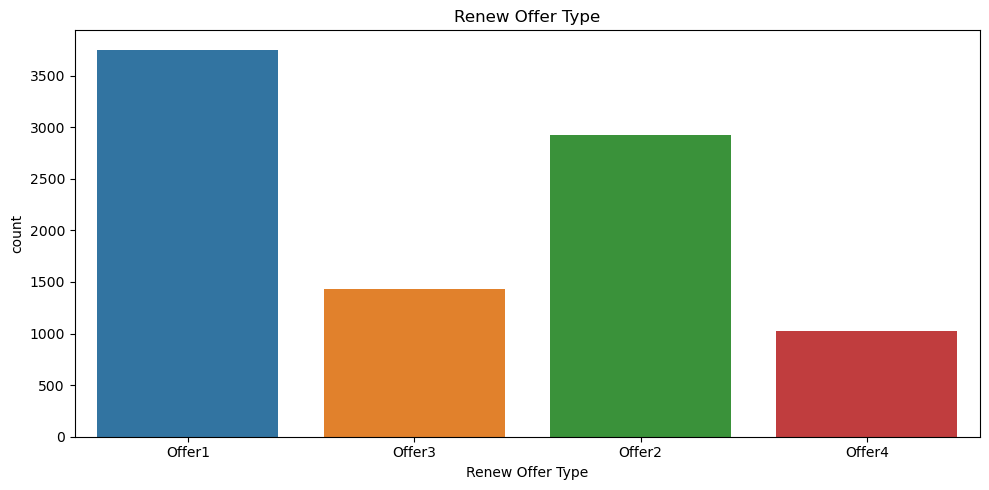

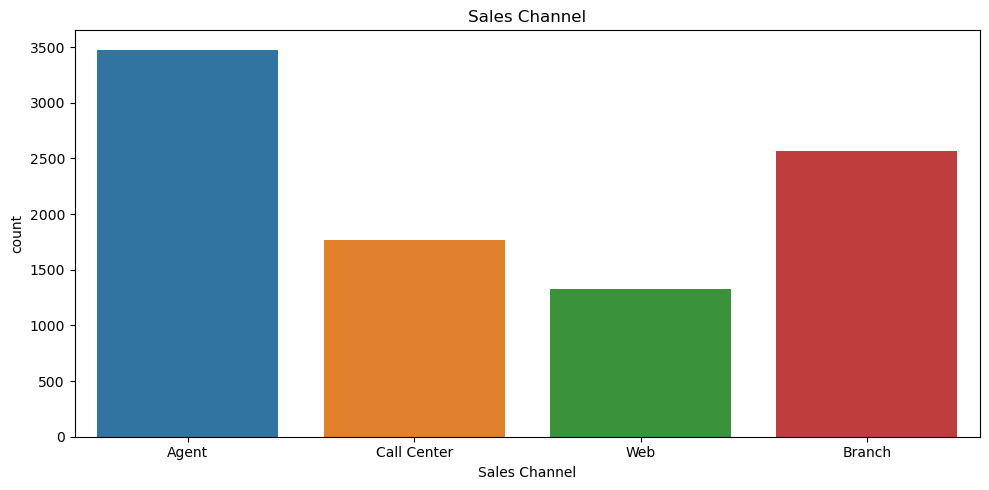

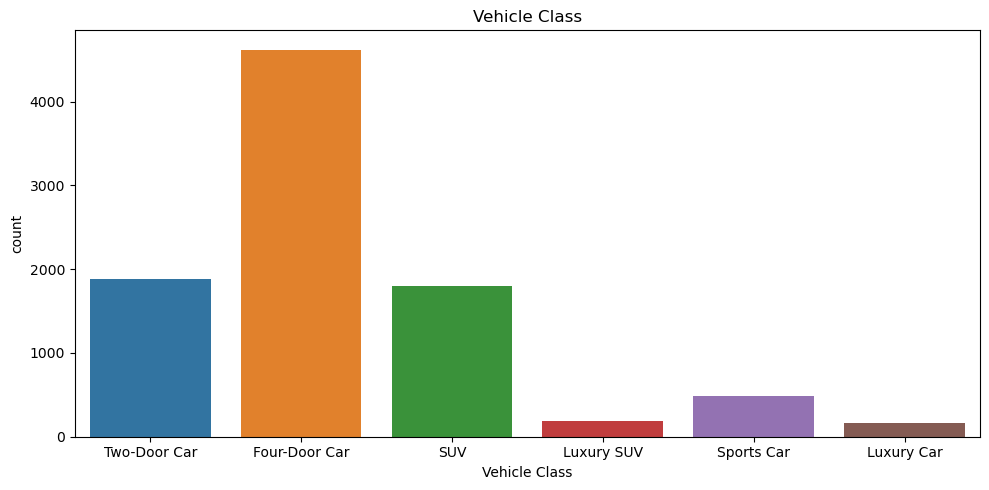

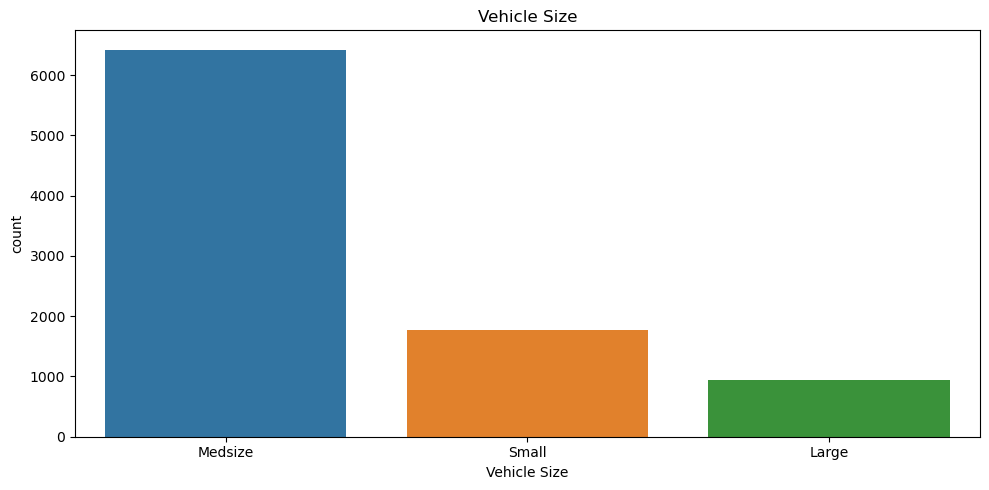

In [10]:
for var in cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[var])
    plt.title(var)
    plt.tight_layout()
    plt.show()

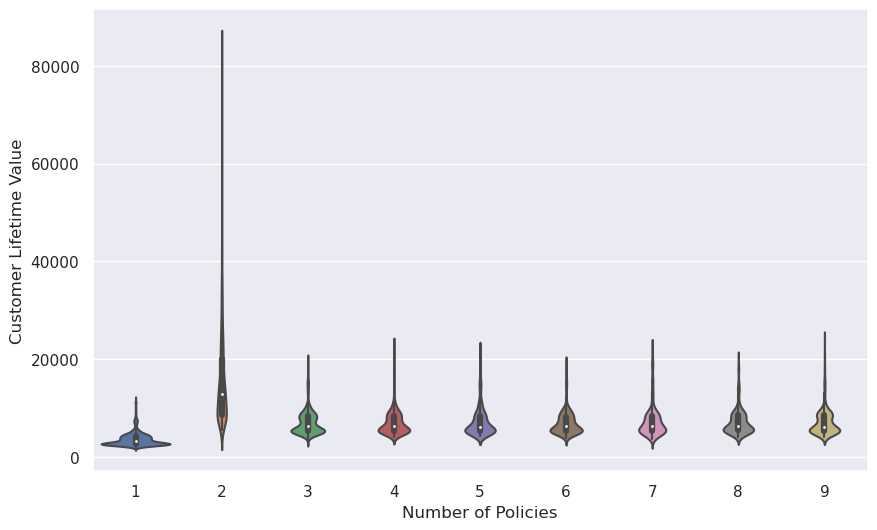

In [11]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
ax = sns.violinplot(x="Number of Policies", y="Customer Lifetime Value", data=df)

The graph indicates that customers who have only taken one policy have a lower customer lifetime value, while those who have taken three or more policies exhibit a similar trend. Therefore, these groups can be combined into a single bin. Additionally, the graph shows that customers who have taken two policies have a significantly higher customer lifetime value compared to the other groups. Moreover, the graph suggests that the customer lifetime value varies depending on the type of coverage selected.

## Statistical Analysis
To gain a better understanding of how each independent variable is impacting the target variable, Customer Lifetime Value (CLV), it is necessary to conduct a statistical analysis. Since CLV is a continuous variable, we will need to perform an **F-test or ANOVA** to determine the significance of each independent variable in relation to the target variable. This will enable us to obtain more precise and statistically significant results.

In [12]:
gender = df[['Customer Lifetime Value','Gender']].groupby('Gender')
female = gender['Customer Lifetime Value'].get_group('F')
male = gender['Customer Lifetime Value'].get_group('M')

In [13]:
import scipy.stats as stats
F, p =  stats.ttest_ind(female,male)

print("F-statistic:", F)
print("p-value:", p)

F-statistic: 1.300686352501256
p-value: 0.19339865630769232


If the **p-value is greater than 0.05**, it indicates that there is no significant variation in the average value of the target variable across different genders. This implies that the 'Gender' feature does not have a significant impact on predicting the 'Customer Lifetime Value', as it is not a strong indicator of the target variable. Therefore, **the gender of the customer is not a significant factor in determining the 'Customer Lifetime Value' in this context.**

In [14]:
# Test whether Covarage differences are significant or not.
Coverage = df[['Customer Lifetime Value','Coverage']].groupby('Coverage')
Basic = Coverage['Customer Lifetime Value'].get_group('Basic')
Extended = Coverage['Customer Lifetime Value'].get_group('Extended')
Premium =Coverage['Customer Lifetime Value'].get_group('Premium')

F, p = stats.f_oneway(Basic,Extended,Premium)
print("F-statistic:", F)
print("p-value:", p)

F-statistic: 133.67511419504905
p-value: 6.0158970099807e-58


If **the p-value is greater than 0.05**, it suggests that there is no notable variation in the average value of the target variable with regard to different types of 'Coverage'. This implies that the 'Coverage' feature is not a significant factor for predicting the 'Customer Lifetime Value' since it does not strongly influence the target variable. **Therefore, in this context, the 'Coverage' feature is not a significant predictor of the 'Customer Lifetime Value'.**

In [15]:
# Test whether Marital Status differences are significant or not.

Marital = df[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
married = Marital['Customer Lifetime Value'].get_group('Married')
single = Marital['Customer Lifetime Value'].get_group('Single')

F, p = stats.ttest_ind(married,single)
print("F-statistic:", F)
print("p-value:", p)

F-statistic: 2.1813329263939916
p-value: 0.029188701551162235


If the **p-value is less than 0.05**, it indicates that there is a considerable difference in the average value of the target variable among at least one group of the 'Marital Status' feature. This implies that 'Marital Status' could be a significant predictor of the 'Customer Lifetime Value', as it has a strong impact on the target variable. Therefore, **in this context, the 'Marital Status' feature is likely to be a relevant feature for predicting the 'Customer Lifetime Value' and could be included in the predictive model.**

In [16]:
# Test whether Vehicle Class differences are significant or not.

Vehicleclass = df[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fourdoor = Vehicleclass['Customer Lifetime Value'].get_group('Four-Door Car')
twodoor = Vehicleclass['Customer Lifetime Value'].get_group('Two-Door Car')
suv = Vehicleclass['Customer Lifetime Value'].get_group('SUV')
luxurysuv =Vehicleclass['Customer Lifetime Value'].get_group('Luxury SUV')
luxurycar =Vehicleclass['Customer Lifetime Value'].get_group('Luxury Car')
sportscar =Vehicleclass['Customer Lifetime Value'].get_group('Sports Car')

F, p = stats.f_oneway(fourdoor,twodoor,suv,luxurysuv,luxurycar,sportscar)
print("F-statistic:", F)
print("p-value:", p)

F-statistic: 267.1581168024349
p-value: 2.085525760212929e-267


In [17]:
# Test whether Renew Offer Type differences are significant or not.

Renewoffer = df[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
offer1 = Renewoffer['Customer Lifetime Value'].get_group('Offer1')
offer2 = Renewoffer['Customer Lifetime Value'].get_group('Offer2')
offer3 = Renewoffer['Customer Lifetime Value'].get_group('Offer3')
offer4 =Renewoffer['Customer Lifetime Value'].get_group('Offer4')

F, p = stats.f_oneway(offer1,offer2,offer3,offer4)
print("F-statistic:", F)
print("p-value:", p)

F-statistic: 25.832614444940408
p-value: 1.238399930571374e-16


In [18]:
# Test whether EmploymentStatus differences are significant or not.


EmploymentStatus = df[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = EmploymentStatus['Customer Lifetime Value'].get_group('Employed')
unemployed = EmploymentStatus['Customer Lifetime Value'].get_group('Unemployed')
medleave = EmploymentStatus['Customer Lifetime Value'].get_group('Medical Leave')
disabled = EmploymentStatus['Customer Lifetime Value'].get_group('Disabled')
retired = EmploymentStatus['Customer Lifetime Value'].get_group('Retired')

F, p = stats.f_oneway(employed,unemployed,medleave,disabled,retired)

print("F-statistic:", F)
print("p-value:", p)

F-statistic: 3.8098087103286047
p-value: 0.00425058662383102


If the **p-value is less than 0.05**, it suggests that there is a substantial variation in the average value of the target variable across at least one group of the 'EmploymentStatus' feature. This implies that 'EmploymentStatus' could be a significant predictor of the 'Customer Lifetime Value', as it has a strong impact on the target variable. **Therefore, in this context, the 'EmploymentStatus' feature is likely to be a relevant feature for predicting the 'Customer Lifetime Value' and could be considered as a significant factor in the predictive model.**





In [19]:
# Test whether Education differences are significant or not.

Education = df[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

F, p = stats.f_oneway(bachelor,college,highschool,master,doctor)

print("F-statistic:", F)
print("p-value:", p)

F-statistic: 2.422865348052191
p-value: 0.04603615409468821


If the **p-value is less than 0.05**, it indicates that there is a noteworthy difference in the average value of the target variable among at least one group of the 'Education' feature. This suggests that 'Education' may be a significant predictor of the 'Customer Lifetime Value', as it has a substantial influence on the target variable. **Thus, in this context, the 'Education' feature is likely to be an important feature for predicting the 'Customer Lifetime Value' and may be considered a significant factor in the predictive model.**

**To check further**